In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import datetime
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd
import numpy as np
import datetime
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_table_18 = pd.read_excel('C:/Users/praka/Downloads/IRI_POS_Tablespreads_2018.xlsx')
df_table_19 = pd.read_excel('C:/Users/praka/Downloads/IRI_POS_Tablespreads_2019.xlsx')
df_table_20 = pd.read_excel('C:/Users/praka/Downloads/IRI_POS_Tablespreads_2020.xlsx')
df_table_21 = pd.read_excel('C:/Users/praka/Downloads/IRI_POS_Tablespreads_2021.xlsx')
df_table_22 = pd.read_excel('C:/Users/praka/Downloads/IRI_POS_Tablespreads_2022.xlsx')
df_table_attributes = pd.read_excel('C:/Users/praka/Downloads/IRI_POS_Tablespreads_Product Attribute File.xlsx')
df_cooking_salads = pd.read_excel('C:/Users/praka/Downloads/IRI_POS_Cooking & Salad Oils_2018-2022.xlsx')
df_cooking_salads_attributes = pd.read_excel('C:/Users/praka/Downloads/IRI_POS_Cooking & Salad Oils_Product Attribute File.xlsx')
df_cooking_sprays = pd.read_excel('C:/Users/praka/Downloads/IRI_POS_Cooking Sprays_2018-2022.xlsx')
df_cooking_sprays_attributes = pd.read_excel('C:/Users/praka/Downloads/IRI_POS_Cooking Spray_Product Attribute File.xlsx')

In [20]:
df_table_attributes = pd.read_excel('C:/Users/praka/Downloads/IRI_POS_Tablespreads_Product Attribute File.xlsx')

In [21]:
ll = ['UPC 13 digit','Geography','Price per Unit','Time','Base Unit Sales','Incremental Units','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch']
df_table_18_qno2 = df_table_18[ll]
df_table_19_qno2 = df_table_19[ll]
df_table_20_qno2 = df_table_20[ll]
df_table_21_qno2 = df_table_21[ll]
df_table_22_qno2 = df_table_22[ll]
df_table_18_qno2['Incremental Units'].fillna(df_table_18_qno2['Incremental Units'].mean(), inplace=True)
df_table_18_qno2['ACV Weighted Distribution No Merch'].fillna(df_table_18_qno2['ACV Weighted Distribution No Merch'].mean(), inplace=True)
df_table_18_qno2['ACV Weighted Distribution Any Merch'].fillna(df_table_18_qno2['ACV Weighted Distribution Any Merch'].mean(), inplace=True)
df_table_19_qno2['Incremental Units'].fillna(df_table_19_qno2['Incremental Units'].mean(), inplace=True)
df_table_19_qno2['ACV Weighted Distribution No Merch'].fillna(df_table_19_qno2['ACV Weighted Distribution No Merch'].mean(), inplace=True)
df_table_19_qno2['ACV Weighted Distribution Any Merch'].fillna(df_table_19_qno2['ACV Weighted Distribution Any Merch'].mean(), inplace=True)
df_table_20_qno2['Incremental Units'].fillna(df_table_20_qno2['Incremental Units'].mean(), inplace=True)
df_table_20_qno2['ACV Weighted Distribution No Merch'].fillna(df_table_20_qno2['ACV Weighted Distribution No Merch'].mean(), inplace=True)
df_table_20_qno2['ACV Weighted Distribution Any Merch'].fillna(df_table_20_qno2['ACV Weighted Distribution Any Merch'].mean(), inplace=True)
df_table_21_qno2['Incremental Units'].fillna(df_table_21_qno2['Incremental Units'].mean(), inplace=True)
df_table_21_qno2['ACV Weighted Distribution No Merch'].fillna(df_table_21_qno2['ACV Weighted Distribution No Merch'].mean(), inplace=True)
df_table_21_qno2['ACV Weighted Distribution Any Merch'].fillna(df_table_21_qno2['ACV Weighted Distribution Any Merch'].mean(), inplace=True)
df_table_22_qno2['Incremental Units'].fillna(df_table_22_qno2['Incremental Units'].mean(), inplace=True)
df_table_22_qno2['ACV Weighted Distribution No Merch'].fillna(df_table_22_qno2['ACV Weighted Distribution No Merch'].mean(), inplace=True)
df_table_22_qno2['ACV Weighted Distribution Any Merch'].fillna(df_table_22_qno2['ACV Weighted Distribution Any Merch'].mean(), inplace=True)

In [22]:
df_table_18_qno2 = df_table_18_qno2[df_table_18_qno2.Geography == 'Total US - Multi Outlet + Conv']
df_table_19_qno2 = df_table_19_qno2[df_table_19_qno2.Geography == 'Total US - Multi Outlet + Conv']
df_table_20_qno2 = df_table_20_qno2[df_table_20_qno2.Geography == 'Total US - Multi Outlet + Conv']
df_table_21_qno2 = df_table_21_qno2[df_table_21_qno2.Geography == 'Total US - Multi Outlet + Conv']
df_table_22_qno2 = df_table_22_qno2[df_table_22_qno2.Geography == 'Total US - Multi Outlet + Conv']
df_table_18_qno2['Sales'] = df_table_18_qno2['Base Unit Sales'] + df_table_18_qno2['Incremental Units']
df_table_19_qno2['Sales'] = df_table_19_qno2['Base Unit Sales'] + df_table_19_qno2['Incremental Units']
df_table_20_qno2['Sales'] = df_table_20_qno2['Base Unit Sales'] + df_table_20_qno2['Incremental Units']
df_table_21_qno2['Sales'] = df_table_21_qno2['Base Unit Sales'] + df_table_21_qno2['Incremental Units']
df_table_22_qno2['Sales'] = df_table_22_qno2['Base Unit Sales'] + df_table_22_qno2['Incremental Units']
df_table_18_qno2['Time'] = pd.to_datetime(df_table_18_qno2['Time'], format='Week Ending %m-%d-%y')
df_table_19_qno2['Time'] = pd.to_datetime(df_table_19_qno2['Time'], format='Week Ending %m-%d-%y')
df_table_20_qno2['Time'] = pd.to_datetime(df_table_20_qno2['Time'], format='Week Ending %m-%d-%y')
df_table_21_qno2['Time'] = pd.to_datetime(df_table_21_qno2['Time'], format='Week Ending %m-%d-%y')
df_table_22_qno2['Time'] = pd.to_datetime(df_table_22_qno2['Time'], format='Week Ending %m-%d-%y')
df_table_18_qno2.drop(['Geography','Base Unit Sales','Incremental Units'],axis=1,inplace=True)
df_table_19_qno2.drop(['Geography','Base Unit Sales','Incremental Units'],axis=1,inplace=True)
df_table_20_qno2.drop(['Geography','Base Unit Sales','Incremental Units'],axis=1,inplace=True)
df_table_21_qno2.drop(['Geography','Base Unit Sales','Incremental Units'],axis=1,inplace=True)
df_table_22_qno2.drop(['Geography','Base Unit Sales','Incremental Units'],axis=1,inplace=True)
df_table_18_qno2 = df_table_18_qno2.groupby(['UPC 13 digit','Time']).sum().reset_index()
df_table_19_qno2 = df_table_19_qno2.groupby(['UPC 13 digit','Time']).sum().reset_index()
df_table_20_qno2 = df_table_20_qno2.groupby(['UPC 13 digit','Time']).sum().reset_index()
df_table_21_qno2 = df_table_21_qno2.groupby(['UPC 13 digit','Time']).sum().reset_index()
df_table_22_qno2 = df_table_22_qno2.groupby(['UPC 13 digit','Time']).sum().reset_index()
df_table_18_qno2['Price ^ 2(tablespread)'] = df_table_18_qno2['Price per Unit'] ** 2
df_table_19_qno2['Price ^ 2(tablespread)'] = df_table_19_qno2['Price per Unit'] ** 2
df_table_20_qno2['Price ^ 2(tablespread)'] = df_table_20_qno2['Price per Unit'] ** 2
df_table_21_qno2['Price ^ 2(tablespread)'] = df_table_21_qno2['Price per Unit'] ** 2
df_table_22_qno2['Price ^ 2(tablespread)'] = df_table_22_qno2['Price per Unit'] ** 2

In [23]:
df_table_attributes.dropna(inplace=True)
set(df_table_attributes['Sub-Category Name'])

{'HAND & BODY LOTION', 'MARGARINE/SPREADS', 'RFG BUTTER', 'RFG BUTTER BLENDS'}

In [24]:
Counter(df_table_attributes['CAG Count Value'])

Counter({'4 CT': 648,
         '1 CT': 1452,
         '8 CT': 12,
         '2 CT': 129,
         '12 CT': 4,
         '10 CT': 1,
         '3 CT': 10,
         '16 CT': 5,
         '200 CT': 2,
         '252 CT': 1,
         '6 CT': 3,
         '5 CT': 5,
         '300 CT': 1,
         '480 CT': 1})

In [25]:
df_table_attributes['CAG Ounces Value'] = df_table_attributes['CAG Ounces Value'].str.extract('(\d+)').astype(int)
df_table_attributes['CAG Count Value'] = df_table_attributes['CAG Count Value'].str.extract('(\d+)').astype(int)
df_table_attributes = df_table_attributes[df_table_attributes['CAG Count Value'].isin([1,2,3,4,5,8,12,16])]
Counter(df_table_attributes['CAG Count Value'])

Counter({4: 648, 1: 1452, 8: 12, 2: 129, 12: 4, 3: 10, 16: 5, 5: 5})

In [26]:
bins = [0, 16, 32, 48, float('inf')]

# Define the labels for each category
labels = ['1-16', '17-32', '32-48', '48+']

df_table_attributes['Ounces'] = pd.cut(df_table_attributes['CAG Ounces Value'], bins=bins, labels=labels)
df_table_attributes.drop(['CAG Ounces Value'],axis=1,inplace=True)
df_table_attributes = df_table_attributes[~df_table_attributes['CAG Tier Value'].isin(['TBD'])]
Counter(df_table_attributes['CAG Tier Value'])

Counter({'VALUE': 143,
         'PREMIUM': 471,
         'MAINSTREAM': 1098,
         'SUPER PREMIUM': 527})

In [27]:
df_table_attributes

,Geography,Time,Product,UPC 13 digit,CAG Major Brand Value,CAG Manufacturer Value,Sub-Category Name,CAG Category Value,CAG Count Value,CAG Form Value,Form,CAG Tier Value,Ounces
1,Total US - Multi Outlet + Conv,Latest 52 Week Pd Ending 01-22-23,BLUE BONNET RFG MARGARINE INDIVDL WRAP IN BOX ...,27000008223,BLUE BONNET,CONAGRA BRANDS,MARGARINE/SPREADS,TABLESPREADS,4,STICKS,QUARTER,VALUE,1-16
2,Total US - Multi Outlet + Conv,Latest 52 Week Pd Ending 01-22-23,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX SPREA...,27000008361,BLUE BONNET,CONAGRA BRANDS,MARGARINE/SPREADS,TABLESPREADS,1,STICKS,SPREAD,VALUE,1-16
3,Total US - Multi Outlet + Conv,Latest 52 Week Pd Ending 01-22-23,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX SPREA...,29000008222,BLUE BONNET,CONAGRA BRANDS,MARGARINE/SPREADS,TABLESPREADS,1,ALL OTHER FORM,SPREAD,VALUE,1-16
4,Total US - Multi Outlet + Conv,Latest 52 Week Pd Ending 01-22-23,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX SPREA...,29000008563,BLUE BONNET,CONAGRA BRANDS,MARGARINE/SPREADS,TABLESPREADS,1,STICKS,SPREAD,VALUE,1-16
5,Total US - Multi Outlet + Conv,Latest 52 Week Pd Ending 01-22-23,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX SPREA...,2700710746763,BLUE BONNET,CONAGRA BRANDS,MARGARINE/SPREADS,TABLESPREADS,1,TUBS,SPREAD,VALUE,1-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,Total US - Multi Outlet + Conv,Latest 52 Week Pd Ending 01-22-23,SMAKOWITA RFG BUTTER PAPER WRAPPED BLOCK 8.81 ...,5900311003391,SMAKOWITA,ZT KRUSZWICA S A,RFG BUTTER,TABLESPREADS,1,ALL OTHER FORM,BLOCK,MAINSTREAM,1-16
2291,Total US - Multi Outlet + Conv,Latest 52 Week Pd Ending 01-22-23,SMAKOWITA RFG MARGARINE PLASTIC TUB SPREAD 15 ...,5900311003991,SMAKOWITA,ZT KRUSZWICA S A,MARGARINE/SPREADS,TABLESPREADS,1,TUBS,SPREAD,MAINSTREAM,1-16
2292,Total US - Multi Outlet + Conv,Latest 52 Week Pd Ending 01-22-23,SMAKOWITA RFG MARGARINE PLASTIC TUB SPREAD 15 ...,5900311004001,SMAKOWITA,ZT KRUSZWICA S A,MARGARINE/SPREADS,TABLESPREADS,1,TUBS,SPREAD,MAINSTREAM,1-16
2293,Total US - Multi Outlet + Conv,Latest 52 Week Pd Ending 01-22-23,SMAKOWITA RFG MARGARINE PLASTIC TUB SPREAD 15....,5900311004081,SMAKOWITA,ZT KRUSZWICA S A,MARGARINE/SPREADS,TABLESPREADS,1,TUBS,SPREAD,MAINSTREAM,1-16


In [28]:
ll = ['UPC 13 digit','Sub-Category Name','CAG Count Value','CAG Form Value','Ounces','CAG Tier Value']
upc_list = df_table_attributes[df_table_attributes['CAG Manufacturer Value'] == 'CONAGRA BRANDS']['UPC 13 digit'].to_list()
df_table_attribute = df_table_attributes[ll]
arr = list(df_table_18_qno2['UPC 13 digit'])
ans = []
def fun(arr,upc_list):
    ans = []
    for i in arr:
        if i in upc_list:
            ans.append(1)
        else:
            ans.append(0)
    return ans
arr = list(df_table_18_qno2['UPC 13 digit'])
ans = fun(arr,upc_list)
df_table_18_qno2['CAG'] = np.array(ans)
arr = list(df_table_19_qno2['UPC 13 digit'])
ans = fun(arr,upc_list)
df_table_19_qno2['CAG'] = np.array(ans)
arr = list(df_table_20_qno2['UPC 13 digit'])
ans = fun(arr,upc_list)
df_table_20_qno2['CAG'] = np.array(ans)
arr = list(df_table_21_qno2['UPC 13 digit'])
ans = fun(arr,upc_list)
df_table_21_qno2['CAG'] = np.array(ans)
arr = list(df_table_22_qno2['UPC 13 digit'])
ans = fun(arr,upc_list)
df_table_22_qno2['CAG'] = np.array(ans)

In [29]:
merge_dataset_qno2_18 = pd.merge(df_table_18_qno2,df_table_attribute, on=['UPC 13 digit'])
merge_dataset_qno2_19 = pd.merge(df_table_19_qno2,df_table_attribute, on=['UPC 13 digit'])
merge_dataset_qno2_20 = pd.merge(df_table_20_qno2,df_table_attribute, on=['UPC 13 digit'])
merge_dataset_qno2_21 = pd.merge(df_table_21_qno2,df_table_attribute, on=['UPC 13 digit'])
merge_dataset_qno2_22 = pd.merge(df_table_22_qno2,df_table_attribute, on=['UPC 13 digit'])

In [30]:
merge_dataset_qno2_18

,UPC 13 digit,Time,Price per Unit,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,Sales,Price ^ 2(tablespread),CAG,Sub-Category Name,CAG Count Value,CAG Form Value,Ounces,CAG Tier Value
0,2027344,2018-06-24,6.116850,0.090243,2.410011,2734.576498,37.415848,0,RFG BUTTER,4,STICKS,1-16,MAINSTREAM
1,2027344,2018-07-01,6.550669,0.385227,2.410011,3237.648816,42.911261,0,RFG BUTTER,4,STICKS,1-16,MAINSTREAM
2,2027344,2018-07-08,6.246198,0.262557,0.200398,708.492452,39.014993,0,RFG BUTTER,4,STICKS,1-16,MAINSTREAM
3,2027344,2018-07-15,6.197467,0.333001,0.201977,927.052683,38.408598,0,RFG BUTTER,4,STICKS,1-16,MAINSTREAM
4,2027344,2018-07-22,6.152511,0.357737,0.175108,939.500437,37.853395,0,RFG BUTTER,4,STICKS,1-16,MAINSTREAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66217,8722700781152,2018-12-02,2.890000,0.021971,2.410011,2702.438557,8.352100,0,MARGARINE/SPREADS,1,TUBS,1-16,MAINSTREAM
66218,8722700781152,2018-12-09,2.890000,0.021621,2.410011,2667.534540,8.352100,0,MARGARINE/SPREADS,1,TUBS,1-16,MAINSTREAM
66219,8722700781152,2018-12-16,2.890000,0.021735,2.410011,2702.549318,8.352100,0,MARGARINE/SPREADS,1,TUBS,1-16,MAINSTREAM
66220,8722700781152,2018-12-23,2.890000,0.022162,2.410011,2702.515507,8.352100,0,MARGARINE/SPREADS,1,TUBS,1-16,MAINSTREAM


In [31]:
one_hot = pd.get_dummies(merge_dataset_qno2_18['CAG Count Value'])
merge_dataset_qno2_18 = pd.concat([merge_dataset_qno2_18, one_hot], axis=1)
merge_dataset_qno2_18.columns

Index([                       'UPC 13 digit',
                                      'Time',
                            'Price per Unit',
        'ACV Weighted Distribution No Merch',
       'ACV Weighted Distribution Any Merch',
                                     'Sales',
                    'Price ^ 2(tablespread)',
                                       'CAG',
                         'Sub-Category Name',
                           'CAG Count Value',
                            'CAG Form Value',
                                    'Ounces',
                            'CAG Tier Value',
                                           1,
                                           2,
                                           3,
                                           4,
                                           5,
                                           8,
                                          12,
                                          16],
      dtype='object')

<AxesSubplot:xlabel='CAG', ylabel='Sales'>

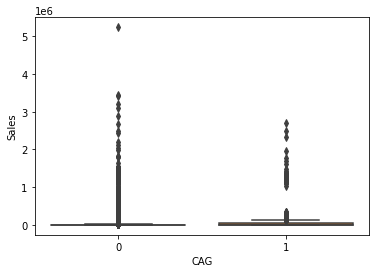

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

#create seaborn boxplots by group
sns.boxplot(x='CAG', y='Sales', data=merge_dataset_qno2_18)

<AxesSubplot:xlabel='CAG Tier Value', ylabel='Sales'>

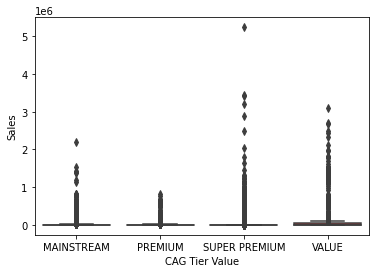

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

#create seaborn boxplots by group
sns.boxplot(x='CAG Tier Value', y='Sales', data=merge_dataset_qno2_18)

<AxesSubplot:xlabel='CAG Form Value', ylabel='Sales'>

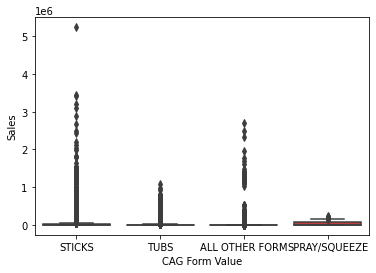

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

#create seaborn boxplots by group
sns.boxplot(x='CAG Form Value', y='Sales', data=merge_dataset_qno2_18)

<AxesSubplot:xlabel='Sub-Category Name', ylabel='Sales'>

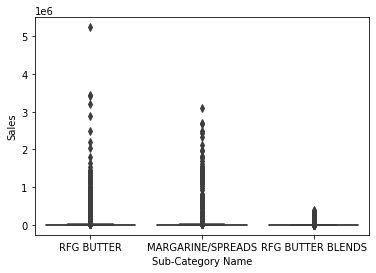

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

#create seaborn boxplots by group
sns.boxplot(x='Sub-Category Name', y='Sales', data=merge_dataset_qno2_18)

In [129]:
x = merge_dataset_qno2_18[['Price per Unit','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch','Price ^ 2(tablespread)','CAG',1,2,3,4,5,8,12]]

y = merge_dataset_qno2_18['Sales'].tolist()

# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     3544.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:22:59   Log-Likelihood:            -8.3304e+05
No. Observations:               66222   AIC:                         1.666e+06
Df Residuals:                   66209   BIC:                         1.666e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [130]:
merge_dataset_qno2_18['CAG * 1'] = merge_dataset_qno2_18['CAG'] * merge_dataset_qno2_18[1]
merge_dataset_qno2_18['CAG * 2'] = merge_dataset_qno2_18['CAG'] * merge_dataset_qno2_18[2]
merge_dataset_qno2_18['CAG * 3'] = merge_dataset_qno2_18['CAG'] * merge_dataset_qno2_18[3]
merge_dataset_qno2_18['CAG * 4'] = merge_dataset_qno2_18['CAG'] * merge_dataset_qno2_18[4]
merge_dataset_qno2_18['CAG * 5'] = merge_dataset_qno2_18['CAG'] * merge_dataset_qno2_18[5]
merge_dataset_qno2_18['CAG * 8'] = merge_dataset_qno2_18['CAG'] * merge_dataset_qno2_18[8]
merge_dataset_qno2_18['CAG * 12'] = merge_dataset_qno2_18['CAG'] * merge_dataset_qno2_18[12]
x = merge_dataset_qno2_18[['Price per Unit','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch','Price ^ 2(tablespread)','CAG',1,2,3,4,5,8,12,'CAG * 1',
                           'CAG * 2','CAG * 3','CAG * 4','CAG * 5','CAG * 8','CAG * 12']]

y = merge_dataset_qno2_18['Sales'].tolist()

# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     2860.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:29:03   Log-Likelihood:            -8.3293e+05
No. Observations:               66222   AIC:                         1.666e+06
Df Residuals:                   66206   BIC:                         1.666e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [131]:
one_hot = pd.get_dummies(merge_dataset_qno2_18['Ounces'])
merge_dataset_qno2_18 = pd.concat([merge_dataset_qno2_18, one_hot], axis=1)
merge_dataset_qno2_18.columns

Index([                       'UPC 13 digit',
                                      'Time',
                            'Price per Unit',
        'ACV Weighted Distribution No Merch',
       'ACV Weighted Distribution Any Merch',
                                     'Sales',
                    'Price ^ 2(tablespread)',
                                       'CAG',
                         'Sub-Category Name',
                           'CAG Count Value',
                            'CAG Form Value',
                                    'Ounces',
                            'CAG Tier Value',
                                           1,
                                           2,
                                           3,
                                           4,
                                           5,
                                           8,
                                          12,
                                          16,
                                  

In [133]:
x = merge_dataset_qno2_18[['Price per Unit','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch','Price ^ 2(tablespread)','CAG','1-16','17-32','32-48']]

y = merge_dataset_qno2_18['Sales'].tolist()

# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     4994.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:35:52   Log-Likelihood:            -8.3384e+05
No. Observations:               66222   AIC:                         1.668e+06
Df Residuals:                   66213   BIC:                         1.668e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [135]:
merge_dataset_qno2_18['CAG * (1-16)'] = merge_dataset_qno2_18['CAG'] * merge_dataset_qno2_18['1-16']
merge_dataset_qno2_18['CAG * (17-32)'] = merge_dataset_qno2_18['CAG'] * merge_dataset_qno2_18['17-32']
merge_dataset_qno2_18['CAG * (32-48)'] = merge_dataset_qno2_18['CAG'] * merge_dataset_qno2_18['32-48']
x = merge_dataset_qno2_18[['Price per Unit','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch','Price ^ 2(tablespread)','CAG','1-16','17-32','32-48','CAG * (1-16)','CAG * (17-32)','CAG * (32-48)']]

y = merge_dataset_qno2_18['Sales'].tolist()

# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     3643.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:39:18   Log-Likelihood:            -8.3380e+05
No. Observations:               66222   AIC:                         1.668e+06
Df Residuals:                   66210   BIC:                         1.668e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [136]:
one_hot = pd.get_dummies(merge_dataset_qno2_18['Sub-Category Name'])
merge_dataset_qno2_18 = pd.concat([merge_dataset_qno2_18, one_hot], axis=1)
merge_dataset_qno2_18.columns

Index([                       'UPC 13 digit',
                                      'Time',
                            'Price per Unit',
        'ACV Weighted Distribution No Merch',
       'ACV Weighted Distribution Any Merch',
                                     'Sales',
                    'Price ^ 2(tablespread)',
                                       'CAG',
                         'Sub-Category Name',
                           'CAG Count Value',
                            'CAG Form Value',
                                    'Ounces',
                            'CAG Tier Value',
                                           1,
                                           2,
                                           3,
                                           4,
                                           5,
                                           8,
                                          12,
                                          16,
                                  

In [137]:
x = merge_dataset_qno2_18[['Price per Unit','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch','Price ^ 2(tablespread)','CAG','MARGARINE/SPREADS','RFG BUTTER']]

y = merge_dataset_qno2_18['Sales'].tolist()

# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     5873.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:43:43   Log-Likelihood:            -8.3348e+05
No. Observations:               66222   AIC:                         1.667e+06
Df Residuals:                   66214   BIC:                         1.667e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [138]:
merge_dataset_qno2_18['CAG * Margarine'] = merge_dataset_qno2_18['CAG'] * merge_dataset_qno2_18['MARGARINE/SPREADS']
merge_dataset_qno2_18['CAG * RFG BUTTER'] = merge_dataset_qno2_18['CAG'] * merge_dataset_qno2_18['RFG BUTTER']
x = merge_dataset_qno2_18[['Price per Unit','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch','Price ^ 2(tablespread)','CAG','MARGARINE/SPREADS','RFG BUTTER','CAG * Margarine',
                           'CAG * RFG BUTTER']]

y = merge_dataset_qno2_18['Sales'].tolist()

# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     5139.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:46:34   Log-Likelihood:            -8.3348e+05
No. Observations:               66222   AIC:                         1.667e+06
Df Residuals:                   66213   BIC:                         1.667e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [140]:
one_hot = pd.get_dummies(merge_dataset_qno2_18['CAG Tier Value'])
merge_dataset_qno2_18 = pd.concat([merge_dataset_qno2_18, one_hot], axis=1)
merge_dataset_qno2_18.columns

Index([                       'UPC 13 digit',
                                      'Time',
                            'Price per Unit',
        'ACV Weighted Distribution No Merch',
       'ACV Weighted Distribution Any Merch',
                                     'Sales',
                    'Price ^ 2(tablespread)',
                                       'CAG',
                         'Sub-Category Name',
                           'CAG Count Value',
                            'CAG Form Value',
                                    'Ounces',
                            'CAG Tier Value',
                                           1,
                                           2,
                                           3,
                                           4,
                                           5,
                                           8,
                                          12,
                                          16,
                                  

In [141]:
x = merge_dataset_qno2_18[['Price per Unit','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch','Price ^ 2(tablespread)','CAG','MAINSTREAM','PREMIUM','SUPER PREMIUM']]

y = merge_dataset_qno2_18['Sales'].tolist()

# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     5210.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:49:46   Log-Likelihood:            -8.3330e+05
No. Observations:               66222   AIC:                         1.667e+06
Df Residuals:                   66213   BIC:                         1.667e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [143]:
merge_dataset_qno2_18['CAG * MAINSTREAM'] = merge_dataset_qno2_18['CAG'] * merge_dataset_qno2_18['MAINSTREAM']
merge_dataset_qno2_18['CAG * RFG PREMIUM'] = merge_dataset_qno2_18['CAG'] * merge_dataset_qno2_18['PREMIUM']
merge_dataset_qno2_18['CAG * SUPER PREMIUM'] = merge_dataset_qno2_18['CAG'] * merge_dataset_qno2_18['SUPER PREMIUM']
merge_dataset_qno2_18['CAG * VALUE'] = merge_dataset_qno2_18['CAG'] * merge_dataset_qno2_18['VALUE']
x = merge_dataset_qno2_18[['Price per Unit','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch','Price ^ 2(tablespread)','CAG','MAINSTREAM','PREMIUM','SUPER PREMIUM',
                           'CAG * MAINSTREAM','CAG * RFG PREMIUM','CAG * SUPER PREMIUM','CAG * VALUE']]

y = merge_dataset_qno2_18['Sales'].tolist()

# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     4353.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:55:30   Log-Likelihood:            -8.3274e+05
No. Observations:               66222   AIC:                         1.665e+06
Df Residuals:                   66211   BIC:                         1.666e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [144]:
one_hot = pd.get_dummies(merge_dataset_qno2_18['CAG Form Value'])
merge_dataset_qno2_18 = pd.concat([merge_dataset_qno2_18, one_hot], axis=1)
merge_dataset_qno2_18.columns

Index([                       'UPC 13 digit',
                                      'Time',
                            'Price per Unit',
        'ACV Weighted Distribution No Merch',
       'ACV Weighted Distribution Any Merch',
                                     'Sales',
                    'Price ^ 2(tablespread)',
                                       'CAG',
                         'Sub-Category Name',
                           'CAG Count Value',
                            'CAG Form Value',
                                    'Ounces',
                            'CAG Tier Value',
                                           1,
                                           2,
                                           3,
                                           4,
                                           5,
                                           8,
                                          12,
                                          16,
                                  

In [145]:
x = merge_dataset_qno2_18[['Price per Unit','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch','Price ^ 2(tablespread)','CAG','SPRAY/SQUEEZE','STICKS','TUBS']]

y = merge_dataset_qno2_18['Sales'].tolist()

# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     5327.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:58:08   Log-Likelihood:            -8.3302e+05
No. Observations:               66222   AIC:                         1.666e+06
Df Residuals:                   66213   BIC:                         1.666e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [147]:
merge_dataset_qno2_18['CAG * SPRAY/SQUEEZE'] = merge_dataset_qno2_18['CAG'] * merge_dataset_qno2_18['SPRAY/SQUEEZE']
merge_dataset_qno2_18['CAG * STICKS'] = merge_dataset_qno2_18['CAG'] * merge_dataset_qno2_18['STICKS']
merge_dataset_qno2_18['CAG * TUBS'] = merge_dataset_qno2_18['CAG'] * merge_dataset_qno2_18['TUBS']
merge_dataset_qno2_18['CAG * ALL OTHER FORM'] = merge_dataset_qno2_18['CAG'] * merge_dataset_qno2_18['ALL OTHER FORM']
x = merge_dataset_qno2_18[['Price per Unit','ACV Weighted Distribution No Merch','ACV Weighted Distribution Any Merch','Price ^ 2(tablespread)','CAG','SPRAY/SQUEEZE','STICKS','TUBS',
                           'CAG * SPRAY/SQUEEZE','CAG * STICKS','CAG * TUBS','CAG * ALL OTHER FORM']]

y = merge_dataset_qno2_18['Sales'].tolist()

# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     5985.
Date:                Sat, 22 Apr 2023   Prob (F-statistic):               0.00
Time:                        00:03:29   Log-Likelihood:            -8.2661e+05
No. Observations:               66222   AIC:                         1.653e+06
Df Residuals:                   66210   BIC:                         1.653e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [148]:
merge_dataset_qno2_18.to_csv('merge_dataset_qno2_18.csv',index=True)

In [149]:
merge_dataset_qno2_19.to_csv('merge_dataset_qno2_19.csv',index=True)
merge_dataset_qno2_20.to_csv('merge_dataset_qno2_20.csv',index=True)
merge_dataset_qno2_21.to_csv('merge_dataset_qno2_21.csv',index=True) 
merge_dataset_qno2_22.to_csv('merge_dataset_qno2_22.csv',index=True) 